In [1]:
import matplotlib.pyplot as plt
from scipy.stats import norm, t
import numpy as np
from scipy import stats
from scipy import special
from tqdm import tqdm

# GT distribution of the obstacle

In [2]:
norm(-3, 2).cdf(0.29)

0.9500150944608786

-5.0


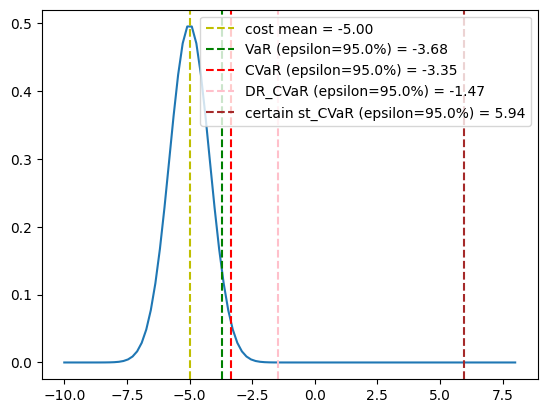

In [3]:
x = 0
p = 8
epsilon = 0.95
mean = 6
l = np.linspace(-10, 8, 100)
point_dist = norm(mean, 0.08)
# plt.plot(l, point_dist.pdf(l))
# plt.show()

cost_mu = x-p+mean/2

sigma = 0.8
print(cost_mu)
cost_dist = norm(cost_mu, sigma)

plt.plot(l, cost_dist.pdf(l))
# VaR = cost_dist.ppf(epsilon)
VaR = cost_dist.ppf(epsilon)
VaR = norm.ppf(epsilon, cost_mu, sigma)
CVaR = cost_mu + sigma * norm.pdf(norm.ppf(epsilon))/(1-epsilon)
plt.axvline(cost_mu, color='y', linestyle='--', label=f'cost mean = {cost_mu:.2f}')

plt.axvline(VaR, color='g', linestyle='--', label=f'VaR (epsilon={epsilon*100}%) = {VaR:.2f}')
plt.axvline(CVaR, color='r', linestyle='--', label=f'CVaR (epsilon={epsilon*100}%) = {CVaR:.2f}')

gamma = np.sqrt(epsilon / (1-epsilon))
theta = 0.01
DR_CVaR = cost_mu + gamma * sigma + theta * np.sqrt(1+gamma**2)
plt.axvline(DR_CVaR, color='pink', linestyle='--', label=f'DR_CVaR (epsilon={epsilon*100}%) = {DR_CVaR:.2f}')

# mu_0, lambda_, alpha, beta = 3.4548569, 0.02503136, 4.8973227, 0.06900783

# t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))

# uc_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
# plt.axvline(uc_st_CVaR, color='purple', linestyle='--', label=f'uncertain st_CVaR (epsilon={epsilon*100}%) = {uc_st_CVaR:.2f}')

mu_0, lambda_, alpha, beta = 5.920605, 0.88203037, 4.362318, 0.01417785

t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))

c_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
plt.axvline(c_st_CVaR, color='brown', linestyle='--', label=f'certain st_CVaR (epsilon={epsilon*100}%) = {c_st_CVaR:.2f}')





plt.legend()


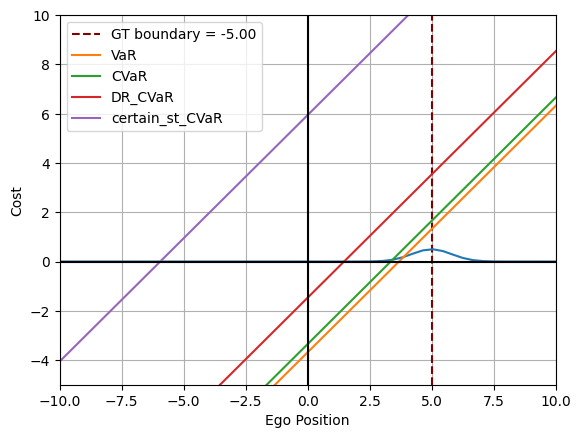

In [4]:
plt.figure()
plt.axvline(p-mean/2, color='maroon', linestyle='--', label=f'GT boundary = {cost_mu:.2f}')

l = np.linspace(-20, 20, 100)
plt.plot(l, norm.pdf(l, p-mean/2, sigma))

labels = ['VaR', 'CVaR', 'DR_CVaR', 'certain_st_CVaR']
for i, risk in enumerate([VaR, CVaR, DR_CVaR, c_st_CVaR]):
    plt.plot(l, (lambda x: x+risk)(l), label=labels[i])
plt.xlim(-10,10)
plt.ylim(-5,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.xlabel("Ego Position")
plt.ylabel("Cost")
plt.legend()
plt.show()

# Certain case

In [5]:
1.6791 * 1.4061 * 0.1101, 0.1159 * 2.0627

(0.259944174351, 0.23906693)

cost mu:  -0.8344765000000001
Sigma:  0.1159034173700785
c1:  1.0725370507240128
debug
-0.8344765000000001
c2:  -0.5744174655612343
sigma hat:  0.11015078989243456
CVaR coef:  2.0627128075074257
st CVaR coef:  1.6791130543920612
st rest...:  1.4060617429124707
-0.5744174655612343
coefficients: CVar=2.0627128075074257
DR_CVaR


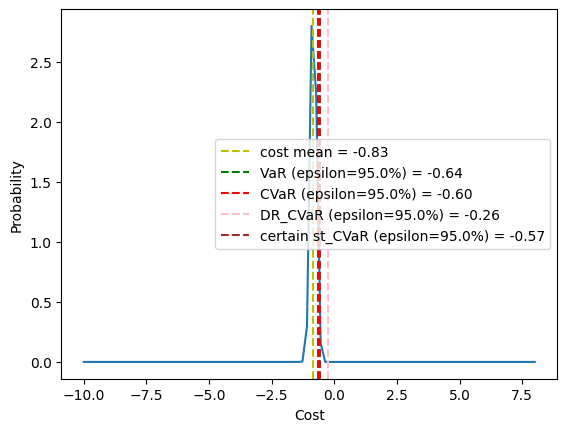

In [11]:
x = 0
p = 3
epsilon = 0.95
mean = 4.3
l = np.linspace(-10, 8, 100)
point_dist = norm(mean, 0.08)
# plt.plot(l, point_dist.pdf(l))
# plt.show()

mu_0, lambda_, alpha, beta = 4.331047, 10.395155, 5.679753, 0.06286594
cost_mu = x-p+mu_0/2
print("cost mu: ",cost_mu)
# sigma = (beta / ((alpha-1)*lambda_))**(1/2)
sigma = (beta / (alpha-1))**(1/2)
print("Sigma: ",sigma)
cost_dist = norm(cost_mu, sigma)

plt.plot(l, cost_dist.pdf(l))
# VaR = cost_dist.ppf(epsilon)
VaR = cost_dist.ppf(epsilon)
VaR = norm.ppf(epsilon, cost_mu, sigma)

CVaR = cost_mu + sigma * norm.pdf(norm.ppf(epsilon))/(1-epsilon)
plt.axvline(cost_mu, color='y', linestyle='--', label=f'cost mean = {cost_mu:.2f}')

plt.axvline(VaR, color='g', linestyle='--', label=f'VaR (epsilon={epsilon*100}%) = {VaR:.2f}')
plt.axvline(CVaR, color='r', linestyle='--', label=f'CVaR (epsilon={epsilon*100}%) = {CVaR:.2f}')

gamma = np.sqrt(epsilon / (1-epsilon))
theta = 0.015
DR_CVaR = cost_mu + gamma * sigma + theta * np.sqrt(1+gamma**2)
plt.axvline(DR_CVaR, color='pink', linestyle='--', label=f'DR_CVaR (epsilon={epsilon*100}%) = {DR_CVaR:.2f}')

# mu_0, lambda_, alpha, beta = 3.4548569, 0.02503136, 4.8973227, 0.06900783

# t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))

# uc_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
# plt.axvline(uc_st_CVaR, color='purple', linestyle='--', label=f'uncertain st_CVaR (epsilon={epsilon*100}%) = {uc_st_CVaR:.2f}')


t_dist = t((2*alpha), cost_mu, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))
num = 2*alpha
c_st_CVaR = cost_mu + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/((2*alpha-1)*(1-epsilon))) * t_dist.pdf(t_dist.ppf(epsilon))
print("c1: ",c_st_CVaR)
print("debug")
print(cost_mu)
# print(cost_mu + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * t_dist.pdf(t_dist.ppf(epsilon)) / )
c_st_CVaR = cost_mu + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t.ppf(epsilon, num)**2)/((2*alpha-1)*(1-epsilon))) * t.pdf(t.ppf(epsilon, num), num)

print("c2: ",c_st_CVaR)
# c_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * 1/(2*alpha-1)*(1-epsilon) * t.pdf(t.ppf(epsilon, num), num)
print("sigma hat: ",((beta * (1+lambda_))/(lambda_*alpha))**(1/2))
print("CVaR coef: ",norm.pdf(norm.ppf(epsilon))/(1-epsilon))
print("st CVaR coef: ",t.pdf(t.ppf(epsilon, num), num)/(1-epsilon))
print("st rest...: ",(2*alpha+t.ppf(epsilon, num)**2)/(2*alpha-1))
print(c_st_CVaR)

plt.axvline(c_st_CVaR, color='brown', linestyle='--', label=f'certain st_CVaR (epsilon={epsilon*100}%) = {c_st_CVaR:.2f}')


print(f"coefficients: CVar={norm.pdf(norm.ppf(epsilon))/(1-epsilon)}\nDR_CVaR")


plt.legend()

plt.xlabel("Cost")
plt.ylabel("Probability")
plt.show()

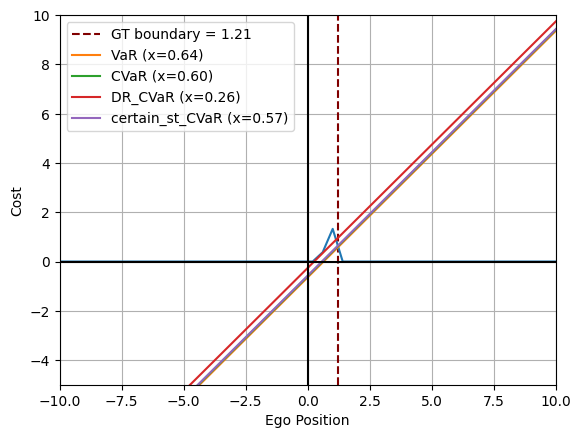

In [12]:
plt.figure()
plt.axvline(1.21, color='maroon', linestyle='--', label=f'GT boundary = {1.21:.2f}')

l = np.linspace(-20, 20, 100)
plt.plot(l, norm.pdf(l, p-mean/2, sigma))

labels = ['VaR', 'CVaR', 'DR_CVaR', 'certain_st_CVaR']
for i, risk in enumerate([VaR, CVaR, DR_CVaR, c_st_CVaR]):
    plt.plot(l, (lambda x: x+risk)(l), label=f"{labels[i]} (x={-risk:.2f})")
plt.xlim(-10,10)
plt.ylim(-5,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.xlabel("Ego Position")
plt.ylabel("Cost")
plt.legend()
plt.show()

# uncertain case

sigma:  0.13306566292515276
-1.27257155


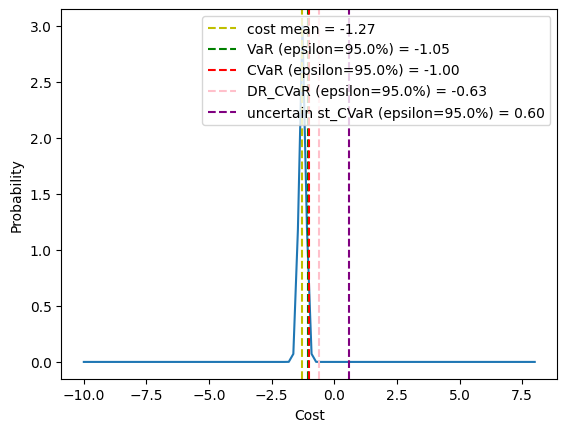

In [13]:
x = 0
p = 3
epsilon = 0.95
mean = 3.4
l = np.linspace(-10, 8, 100)
point_dist = norm(mean, 0.08)
# plt.plot(l, point_dist.pdf(l))
# plt.show()
mu_0, lambda_, alpha, beta = 3.4548569, 0.02503136, 4.8973227, 0.06900783

cost_mu = x-p+mu_0/2
sigma = (beta / (alpha-1))**(1/2)
print("sigma: ",sigma)
# sigma = (beta / ((alpha-1)*lambda_))**(1/2)

print(cost_mu)
cost_dist = norm(cost_mu, sigma)

plt.plot(l, cost_dist.pdf(l))
# VaR = cost_dist.ppf(epsilon)
VaR = cost_dist.ppf(epsilon)
VaR = norm.ppf(epsilon, cost_mu, sigma)
CVaR = cost_mu + sigma * norm.pdf(norm.ppf(epsilon))/(1-epsilon)
plt.axvline(cost_mu, color='y', linestyle='--', label=f'cost mean = {cost_mu:.2f}')

plt.axvline(VaR, color='g', linestyle='--', label=f'VaR (epsilon={epsilon*100}%) = {VaR:.2f}')
plt.axvline(CVaR, color='r', linestyle='--', label=f'CVaR (epsilon={epsilon*100}%) = {CVaR:.2f}')

gamma = np.sqrt(epsilon / (1-epsilon))
theta = 0.015
DR_CVaR = cost_mu + gamma * sigma + theta * np.sqrt(1+gamma**2)
plt.axvline(DR_CVaR, color='pink', linestyle='--', label=f'DR_CVaR (epsilon={epsilon*100}%) = {DR_CVaR:.2f}')


t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))
num = 2*alpha+1
uc_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
uc_st_CVaR = cost_mu + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t.ppf(epsilon, num)**2)/((2*alpha-1)*(1-epsilon))) * t.pdf(t.ppf(epsilon, num), num)
plt.axvline(uc_st_CVaR, color='purple', linestyle='--', label=f'uncertain st_CVaR (epsilon={epsilon*100}%) = {uc_st_CVaR:.2f}')

# mu_0, lambda_, alpha, beta = 5.920605, 0.88203037, 4.362318, 0.01417785

# t_dist = t((2*alpha), mu_0, ((beta*(1+lambda_))/(lambda_*alpha))**(1/2))

# c_st_CVaR = mu_0 + ((beta * (1+lambda_))/(lambda_*alpha))**(1/2) * ((2*alpha+t_dist.ppf(epsilon)**2)/(2*alpha-1)*(1-epsilon)) * t_dist.pdf(t_dist.ppf(epsilon))
# plt.axvline(c_st_CVaR, color='brown', linestyle='--', label=f'certain st_CVaR (epsilon={epsilon*100}%) = {c_st_CVaR:.2f}')





plt.legend()

plt.xlabel("Cost")
plt.ylabel("Probability")
plt.show()

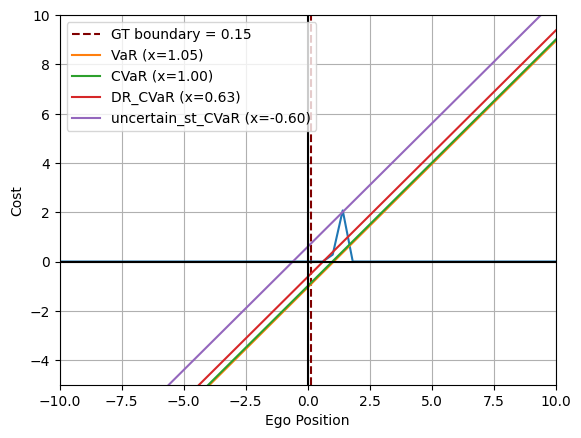

In [14]:
plt.figure()
plt.axvline(0.15, color='maroon', linestyle='--', label=f'GT boundary = {0.15:.2f}')

l = np.linspace(-20, 20, 100)
plt.plot(l, norm.pdf(l, p-mean/2, sigma))

labels = ['VaR', 'CVaR', 'DR_CVaR', 'uncertain_st_CVaR']
for i, risk in enumerate([VaR, CVaR, DR_CVaR, uc_st_CVaR]):
    plt.plot(l, (lambda x: x+risk)(l), label=f"{labels[i]} (x={-risk:.2f})")
plt.xlim(-10,10)
plt.ylim(-5,10)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.xlabel("Ego Position")
plt.ylabel("Cost")
plt.legend()
plt.show()

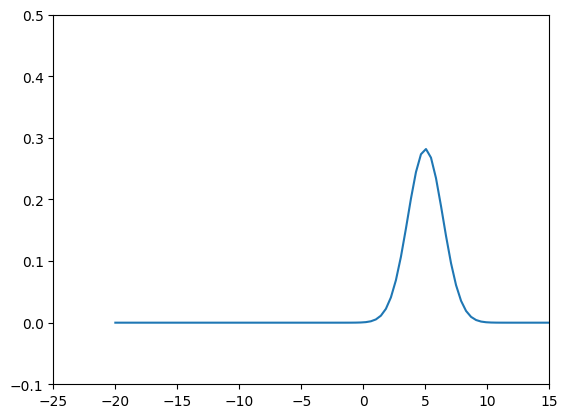

In [124]:
mu = 5
sigma_2 = 2
sigma = np.sqrt(sigma_2)
gt_dist = norm(loc=mu, scale=sigma)

l = np.linspace(-20, 20, 100)
plt.plot(l, gt_dist.pdf(l))
plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.show()

# observe samples

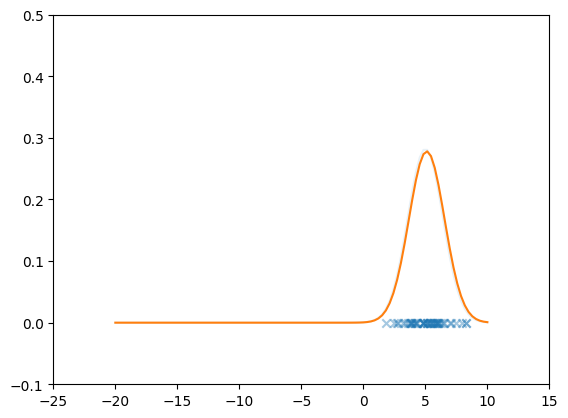

In [17]:

l = np.linspace(-20, 10, 100)
num_samples = 50
samples = norm.rvs(mu, sigma, size=num_samples)
mu_hat, sigma_hat = norm.fit(samples)


# plot GT distribution
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu, sigma), label='GT Gaussian Distribution', alpha=0.1)

# plot samples
# num_samples = 20
# samples = norm.rvs(mu, sigma, size=num_samples)
plt.scatter(samples,[0 for _ in range(num_samples)], marker='x', alpha=0.4, label='Observed Samples')

# plot pred distribution
# mu_hat, sigma_hat = norm.fit(samples)
# l = np.linspace(-20, 10, 100)
plt.plot(l, norm.pdf(l, mu_hat, sigma_hat), label='Predicted Gaussian Distribution')

plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.show()


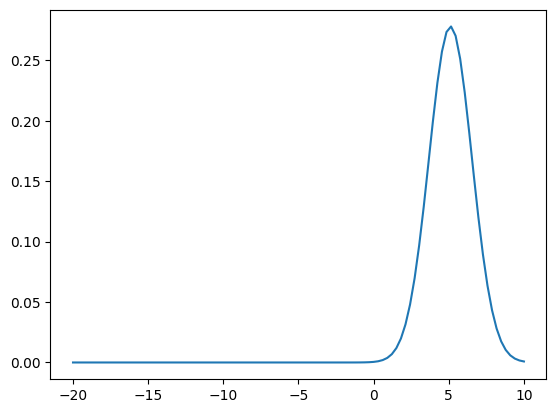

In [18]:
pred_dist = norm(loc=mu_hat, scale=sigma_hat)

plt.plot(l, pred_dist.pdf(l))
plt.show()

# loss = ego_position - obstable_position (obs is random variable)
- random variable에 음수가 붙어있어서 분포의 왼쪽에 risk가 생기게 된다.

$\theta$

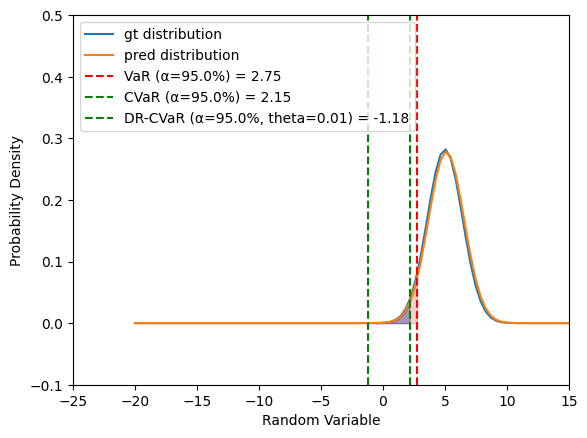

In [19]:
# alpha = 0.95
alpha = 0.95

l = np.linspace(-20, 20, 100)
plt.plot(l, gt_dist.pdf(l), label='gt distribution')
plt.plot(l, pred_dist.pdf(l), label='pred distribution')

x = np.linspace(mu_hat - 4*sigma_hat, mu_hat + 4*sigma_hat, 1000)
y = stats.norm.pdf(x, mu_hat, sigma_hat)

# VaR = gt_dist.ppf(alpha)
VaR_beta = np.sqrt(2) * special.erfinv(2*alpha-1)
VaR = mu_hat - VaR_beta * sigma_hat

#beta = norm.pdf(norm.ppf(alpha))/(1-alpha)
CVaR_beta = 1/(np.sqrt(2*np.pi)*(np.exp(special.erfinv(2*alpha - 1)**2))*(1-alpha))
CVaR = mu_hat - CVaR_beta * sigma_hat

DR_CVaR_beta = np.sqrt(alpha / (1-alpha))
theta = 0.01
DR_CVaR = mu_hat - DR_CVaR_beta * sigma_hat - theta * np.sqrt(1+DR_CVaR_beta**2)

plt.axvline(VaR, color='r', linestyle='--', label=f'VaR (α={alpha*100}%) = {VaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= VaR), color='r', alpha=0.2)

plt.axvline(CVaR, color='g', linestyle='--', label=f'CVaR (α={alpha*100}%) = {CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= CVaR), color='g', alpha=0.2)

plt.axvline(DR_CVaR, color='g', linestyle='--', label=f'DR-CVaR (α={alpha*100}%, theta={theta}) = {DR_CVaR:.2f}')
plt.fill_between(x, 0, y, where=(x <= CVaR), color='b', alpha=0.2)

plt.xlim(-25, 15)
plt.ylim(-0.1, 0.5)
plt.xlabel('Random Variable')
plt.ylabel('Probability Density')
plt.legend()
plt.show()


# Plot safe region

In [66]:
p-mean/2
mean

6

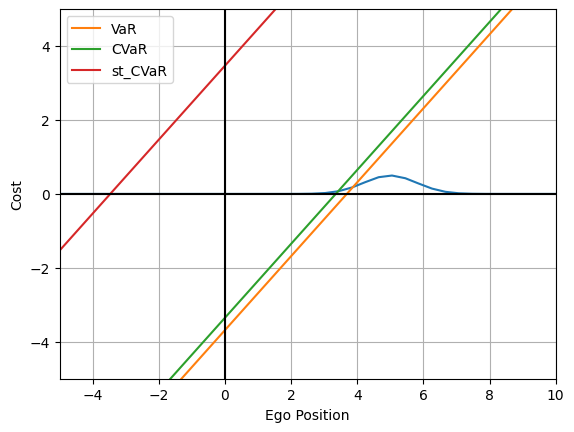

In [70]:
plt.figure()

l = np.linspace(-20, 20, 100)
plt.plot(l, norm.pdf(l, p-mean/2, sigma))

labels = ['VaR', 'CVaR', 'st_CVaR']
for i, risk in enumerate([VaR, CVaR, st_CVaR]):
    plt.plot(l, (lambda x: x+risk)(l), label=labels[i])
plt.xlim(-5,10)
plt.ylim(-5,5)
plt.axhline(y=0, color='k')
plt.axvline(x=0, color='k')
plt.grid(True, which='both')
plt.xlabel("Ego Position")
plt.ylabel("Cost")
plt.legend()
plt.show()

In [26]:
mu_0 = 5.011456
lambda_ = 0.03707089
alpha = 5.497464
beta = 0.00185288
epsilon = 0.95

In [27]:
from scipy.stats import norm, invgamma, t
import numpy as np
import matplotlib.pyplot as plt

In [23]:
mu = np.linspace(-4, 7, 100)
sigma2 = np.linspace(0., 0.5, 100)
mu_grid, sigma2_grid = np.meshgrid(mu, sigma2)

In [24]:
pdf_values = np.zeros_like(mu_grid)

for i in range(mu_grid.shape[0]):
    for j in range(mu_grid.shape[1]):
        mu_val = mu_grid[i, j]
        sigma2_val = sigma2_grid[i, j]
        # Normal-Inverse Gamma PDF (up to proportionality constant)
        # pdf_values[i, j] = (sigma2_val ** (-alpha - 1)) * np.exp(-beta / sigma2_val) * \
        #                    norm.pdf(mu_val, mu_0, np.sqrt(sigma2_val / lambda_))
        pdf_values[i, j] = invgamma.pdf(sigma2_val, alpha, beta) * norm.pdf(mu_val, mu_0, np.sqrt(sigma2_val / lambda_))


/home/opencda/.local/lib/python3.8/site-packages/scipy/stats/_distn_infrastructure.py:1760: RuntimeWarning: divide by zero encountered in divide
  x = np.asarray((x - loc)/scale, dtype=dtyp)


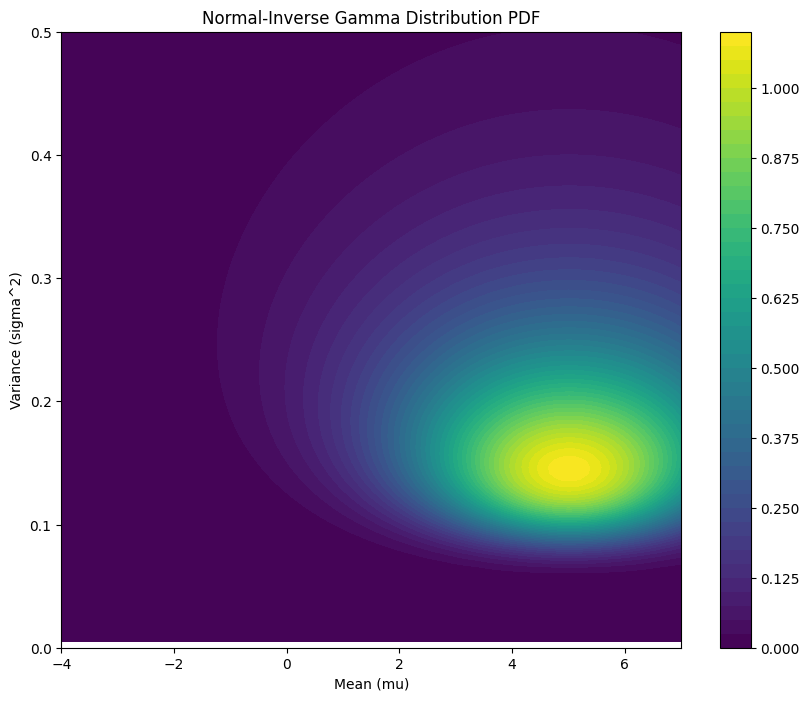

In [25]:
plt.figure(figsize=(10, 8))


cp = plt.contourf(mu, sigma2, pdf_values, levels=50, cmap='viridis')
plt.colorbar(cp)

plt.xlabel('Mean (mu)')
plt.ylabel('Variance (sigma^2)')
plt.title('Normal-Inverse Gamma Distribution PDF')

plt.xlim(-4,7)
plt.ylim(0,0.5)
plt.show()

In [30]:
cvar = mu_0 + (beta * (1+lambda_))/(lambda_*alpha)*((2*alpha+t.ppf(epsilon,2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0)**2)/((2*alpha-1)*(1-epsilon)))*t.pdf(t.ppf(epsilon,2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0), 2*alpha, (beta*(1+lambda_))/(lambda_*alpha), mu_0) 

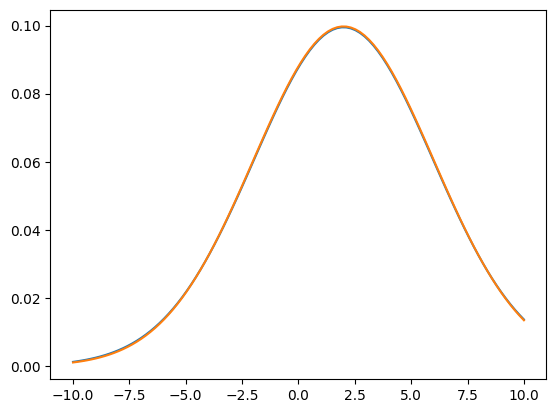

In [55]:
x = np.linspace(-10,10,100)
plt.plot(x, t.pdf(x,100, 2, 4))
plt.plot(x, norm.pdf(x, 2,4))
plt.show()